In [1]:
import pandas as pd
import requests
import json
import matplotlib
%matplotlib inline

# Dogecoin and Bitcoin market value for last 30 days, vs. USD, deliver a DF and a Plot

In [2]:
base = 'https://api.coingecko.com/api/v3/'

In [3]:
url = base + 'coins/bitcoin/market_chart?vs_currency=usd&days=30'

In [4]:
result = requests.get(url)
j_bc = result.json()

In [5]:
df_bc = pd.DataFrame(j_bc['prices'], columns=['time', 'price'])
df_bc.head(10)

,time,price
0,1595750617880,9711.907504
1,1595754543184,9757.459364
2,1595757662129,9819.109104
3,1595761695243,9987.357043
4,1595765305901,9964.040808
5,1595768890490,9859.954625
6,1595772422810,9883.111241
7,1595775891366,9934.587001
8,1595779396173,9959.591219
9,1595783291349,9905.876235


In [6]:
url = base + 'coins/dogecoin/market_chart'


In [7]:
param_dict = { 'id':'dogecoin', 'vs_currency':'usd', 'days':30}


In [8]:
result = requests.get(url, params=param_dict)


In [9]:
j_dc = result.json()
df_dc = pd.DataFrame(j_dc['prices'], columns=['time', 'price'])
df_dc.head(10)

,time,price
0,1595754499279,0.003253
1,1595758117130,0.003228
2,1595761714210,0.003216
3,1595765280702,0.003224
4,1595768489406,0.003199
5,1595772101361,0.003200
6,1595775719056,0.003200
7,1595779596990,0.003200
8,1595782958862,0.003206
9,1595786461373,0.003216


In [10]:
df_bc = pd.DataFrame(j_bc['prices'], columns=['time', 'price'])
df_bc['time'] = pd.to_datetime(df_bc['time'], unit='ms')

In [11]:
df_bc.set_index('time', inplace=True)
df_bc.head(10)

,price
time,
2020-07-26 08:03:37.880,9711.907504
2020-07-26 09:09:03.184,9757.459364
2020-07-26 10:01:02.129,9819.109104
2020-07-26 11:08:15.243,9987.357043
2020-07-26 12:08:25.901,9964.040808
2020-07-26 13:08:10.490,9859.954625
2020-07-26 14:07:02.810,9883.111241
2020-07-26 15:04:51.366,9934.587001
2020-07-26 16:03:16.173,9959.591219


In [12]:
df_dc = pd.DataFrame(j_dc['prices'], columns=['time', 'price'])
df_dc['time'] = pd.to_datetime(df_dc['time'], unit='ms')

df_dc.set_index('time', inplace=True)
df_dc.head(10)

,price
time,
2020-07-26 09:08:19.279,0.003253
2020-07-26 10:08:37.130,0.003228
2020-07-26 11:08:34.210,0.003216
2020-07-26 12:08:00.702,0.003224
2020-07-26 13:01:29.406,0.003199
2020-07-26 14:01:41.361,0.003200
2020-07-26 15:01:59.056,0.003200
2020-07-26 16:06:36.990,0.003200
2020-07-26 17:02:38.862,0.003206


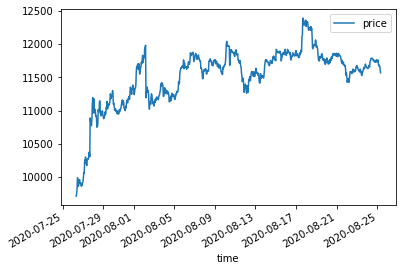

In [13]:
df_bc.plot()

![logo](Dogecoin_logo.png)

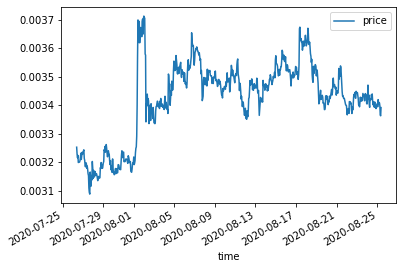

In [14]:
df_dc.plot()

# top ten coins report

In [15]:
url = base + 'coins/list'

In [16]:
result = requests.get(url)
j = result.json()

df_list = pd.DataFrame(j)
df_list.head(10)

,id,symbol,name
0,01coin,zoc,01coin
1,0-5x-long-algorand-token,algohalf,0.5X Long Algorand Token
2,0-5x-long-altcoin-index-token,althalf,0.5X Long Altcoin Index Token
3,0-5x-long-balancer-token,balhalf,0.5X Long Balancer Token
4,0-5x-long-bilibra-token,trybhalf,0.5X Long BiLira Token
5,0-5x-long-bitcoin-cash-token,bchhalf,0.5X Long Bitcoin Cash Token
6,0-5x-long-bitcoin-sv-token,bsvhalf,0.5X Long Bitcoin SV Token
7,0-5x-long-bitcoin-token,half,0.5X Long Bitcoin Token
8,0-5x-long-bitmax-token-token,btmxhalf,0.5X Long BitMax Token Token
9,0-5x-long-bnb-token,bnbhalf,0.5X Long BNB Token


In [17]:
data_df = df_list.iloc[:10, 0]
data_df

0                           01coin
1         0-5x-long-algorand-token
2    0-5x-long-altcoin-index-token
3         0-5x-long-balancer-token
4          0-5x-long-bilibra-token
5     0-5x-long-bitcoin-cash-token
6       0-5x-long-bitcoin-sv-token
7          0-5x-long-bitcoin-token
8     0-5x-long-bitmax-token-token
9              0-5x-long-bnb-token
Name: id, dtype: object

In [18]:
data_list = []

for i in data_df:
    base = "http://api.coingecko.com/api/v3/coins/"
    url = base + i + "/market_chart?vs_currency=usd&days=300"
    result = requests.get(url)
    data = result.json()
    data_df = pd.DataFrame(data['prices'], columns = ['date_time','price'])
    data_df["file_name"] = i
    data_list.append(data_df)

data_report = pd.concat(data_list)
data_report

,date_time,price,file_name
0,1572480000000,0.001871,01coin
1,1572566400000,0.001748,01coin
2,1572652800000,0.001721,01coin
3,1572739200000,0.001423,01coin
4,1572825600000,0.001428,01coin
...,...,...,...
11,1598054400000,7905.177680,0-5x-long-bnb-token
12,1598140800000,7946.084494,0-5x-long-bnb-token
13,1598227200000,7871.054036,0-5x-long-bnb-token
14,1598313600000,7999.239336,0-5x-long-bnb-token


In [19]:
data_report = data_report.set_index('date_time')

data_report.head()

,price,file_name
date_time,,
1572480000000,0.001871,01coin
1572566400000,0.001748,01coin
1572652800000,0.001721,01coin
1572739200000,0.001423,01coin
1572825600000,0.001428,01coin


In [20]:
data_report.to_csv('top_ten_report.csv')

In [21]:
check = pd.read_csv('top_ten_report.csv')
check

,date_time,price,file_name
0,1572480000000,0.001871,01coin
1,1572566400000,0.001748,01coin
2,1572652800000,0.001721,01coin
3,1572739200000,0.001423,01coin
4,1572825600000,0.001428,01coin
...,...,...,...
347,1598054400000,7905.177680,0-5x-long-bnb-token
348,1598140800000,7946.084494,0-5x-long-bnb-token
349,1598227200000,7871.054036,0-5x-long-bnb-token
350,1598313600000,7999.239336,0-5x-long-bnb-token
